In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import json

In [3]:
#raw = pd.read_json('data/Musical_Instruments_5.json')

with open('data/Musical_Instruments_5.json') as f:
    data = f.readlines()

print(type(data))
print(data[1])

#raw = pd.DataFrame(data)
#raw = pd.read_json(data, lines = True)
raw = pd.read_json('data/Musical_Instruments_5.json', lines = True)
raw.head()

<class 'list'>
{"reviewerID": "A14VAT5EAX3D9S", "asin": "1384719342", "reviewerName": "Jake", "helpful": [13, 14], "reviewText": "The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]", "overall": 5.0, "summary": "Jake", "unixReviewTime": 1363392000, "reviewTime": "03 16, 2013"}



,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1384719342,"[0, 0]",5,"Not much to write about here, but it does exac...","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600
1,1384719342,"[13, 14]",5,The product does exactly as it should and is q...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000
2,1384719342,"[1, 1]",5,The primary job of this device is to block the...,"08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000
3,1384719342,"[0, 0]",5,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000
4,1384719342,"[0, 0]",5,This pop filter is great. It looks and perform...,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800


In [4]:
#Lets create our features and outcome
raw['positiveReview'] = np.where(raw['overall'] >= 4, True, False)
Y = raw['positiveReview']

feat = raw[['helpful', 'reviewText', 'summary']]

#create helpfulScore array
helpfulScore = []
for entry in feat['helpful']:
    helpfulScore.append(entry[0] - entry[1])
    
feat['helpfulScore'] = helpfulScore
feat['isHelpful'] = np.where(feat['helpfulScore'] >= 0, True, False)
#feat.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [5]:
#Keyword strings:
keywords = ['good', 'great', 'sound', 'vibrato']
for key in keywords:
    feat[str(key)] = feat.reviewText.str.contains(str(key), case = False) | feat.summary.str.contains(str(key), case = False)
    
feat.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,helpful,reviewText,summary,helpfulScore,isHelpful,good,great,sound,vibrato
0,"[0, 0]","Not much to write about here, but it does exac...",good,0,True,True,False,True,False
1,"[13, 14]",The product does exactly as it should and is q...,Jake,-1,False,False,False,False,False
2,"[1, 1]",The primary job of this device is to block the...,It Does The Job Well,0,True,False,False,True,False
3,"[0, 0]",Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,0,True,True,False,False,False
4,"[0, 0]",This pop filter is great. It looks and perform...,No more pops when I record my vocals.,0,True,False,True,False,False


In [6]:
#Set up X
X = feat[['isHelpful'] + keywords]

In [7]:
#Make data validation easier by combining the features and outcomes into one single dataframe.
data = X
data['positiveReview'] = Y
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,isHelpful,good,great,sound,vibrato,positiveReview
0,True,True,False,True,False,True
1,False,False,False,False,False,True
2,True,False,False,True,False,True
3,True,True,False,False,False,True
4,True,False,True,False,False,True


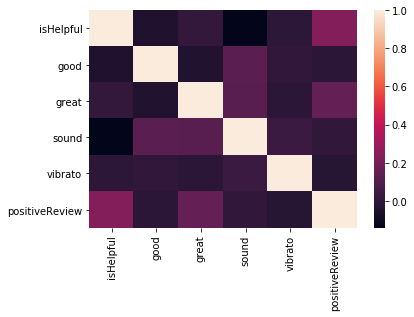

In [8]:
sns.heatmap(data.corr())

In [9]:
#Train naive bayes and validate
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X, Y)

Y_predicted = bnb.predict(X)

print('{} mislabeled points out of {}.'. format((Y != Y_predicted).sum(), X.shape[0])) #Wat?

0 mislabeled points out of 10261.


__Model Validation__

I get nervous when the model appears to have 100% accuracy when trained and tested on the entire dataset, especially when I haven't optimized the features. It is almost a sure sign of overfitting. We had better train a new model and test it on a holdout group to be sure.

In [13]:
#Make a holdout group
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5)

bnb_val = BernoulliNB()
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

1.0

Here we train the model on 50% of the data and test it on the other 50%. This implies that our model is not overfitting.

In [16]:
from sklearn.model_selection import cross_val_score

#Fresh, untrained model
bnb_flds = BernoulliNB()

cross_val_score(bnb_flds, X, Y, cv = 10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

__Analysis__

I have a hard time believing what I am seeing, Naive Bayes working perfectly without hardly any feature engineering right out of the box, even over 10-fold cross validation scoring.